deployment 01_2014
C:\Users\sa01ld\m_moorproc_toolbox\exec\gitrepo\export_Oceansites\oceansites_format\rteb1_01_2014_MCAT.nc
 data from this deployment are saved at X:\Marphys_Archive\Data\OSNAP\THREDDS_DATA\Rockall_Trough_mooring_RTEB1_stacked_time_series_TS_201407_202207_v0.nc
deployment 02_2015
C:\Users\sa01ld\m_moorproc_toolbox\exec\gitrepo\export_Oceansites\oceansites_format\rteb1_02_2015_MCAT.nc
 data from this deployment are saved at X:\Marphys_Archive\Data\OSNAP\THREDDS_DATA\Rockall_Trough_mooring_RTEB1_stacked_time_series_TS_201407_202207_v0.nc
deployment 03_2016
C:\Users\sa01ld\m_moorproc_toolbox\exec\gitrepo\export_Oceansites\oceansites_format\rteb1_03_2016_MCAT.nc
 data from this deployment are saved at X:\Marphys_Archive\Data\OSNAP\THREDDS_DATA\Rockall_Trough_mooring_RTEB1_stacked_time_series_TS_201407_202207_v0.nc
deployment 04_2017
C:\Users\sa01ld\m_moorproc_toolbox\exec\gitrepo\export_Oceansites\oceansites_format\rteb1_04_2017_MCAT.nc
 data from this deployment are save

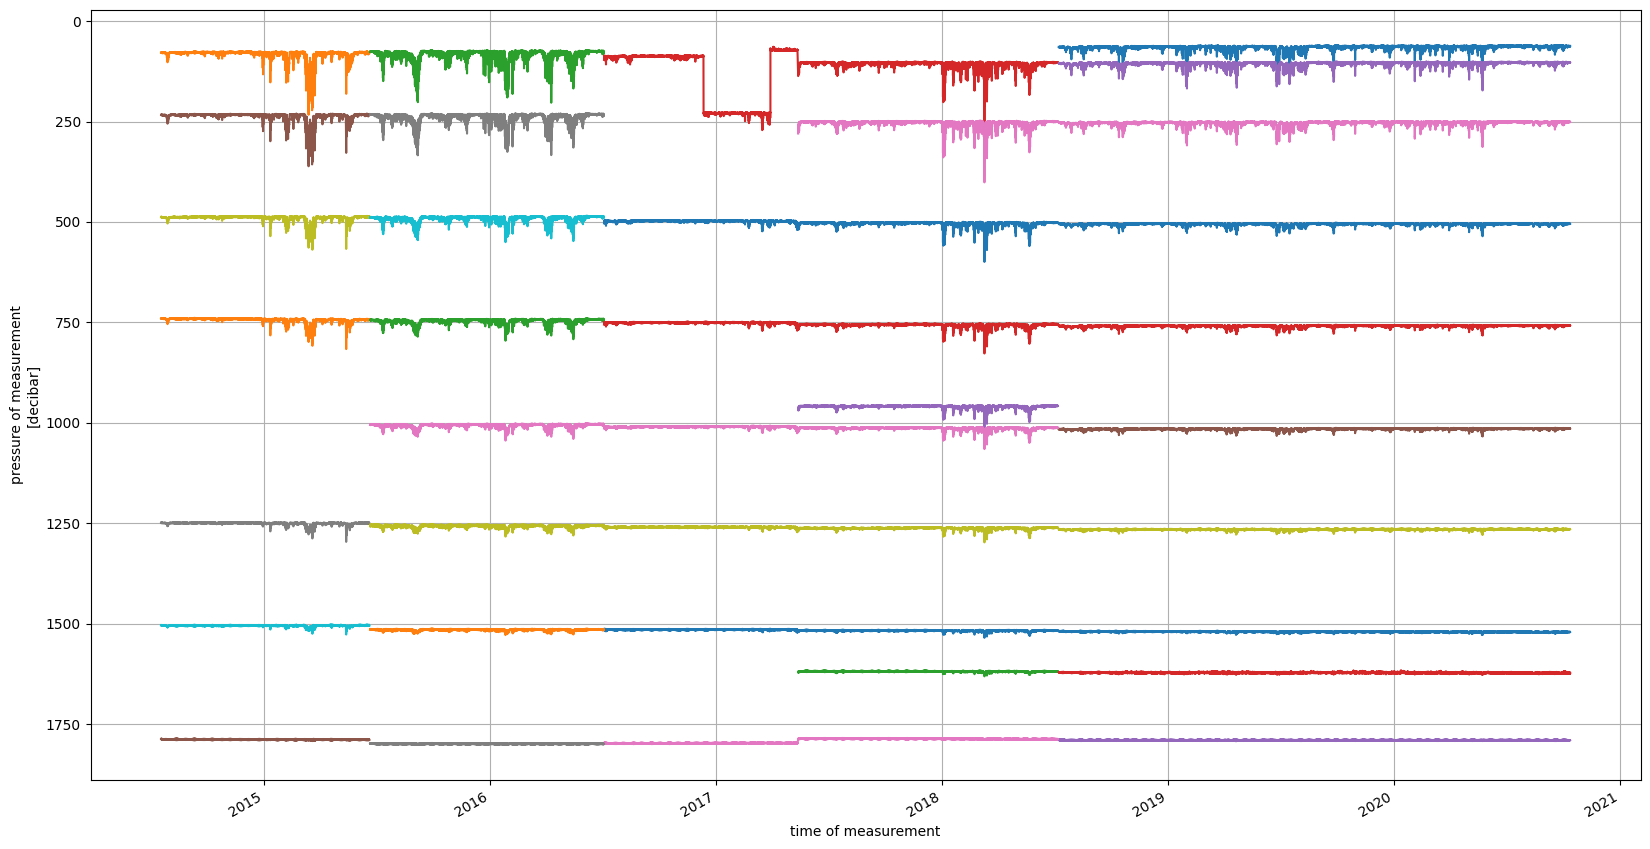

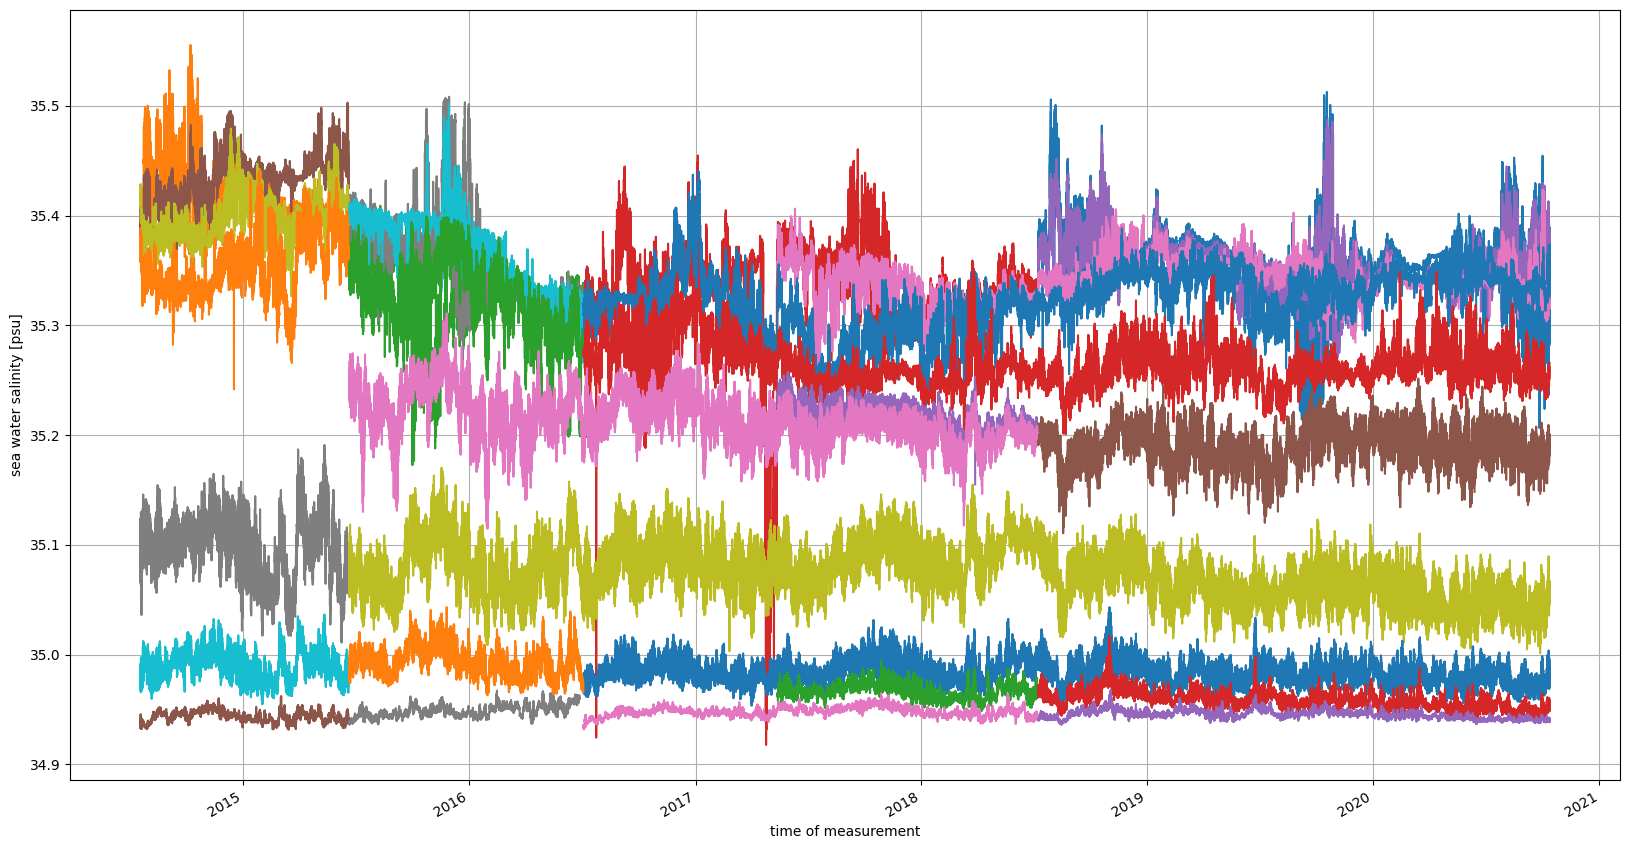

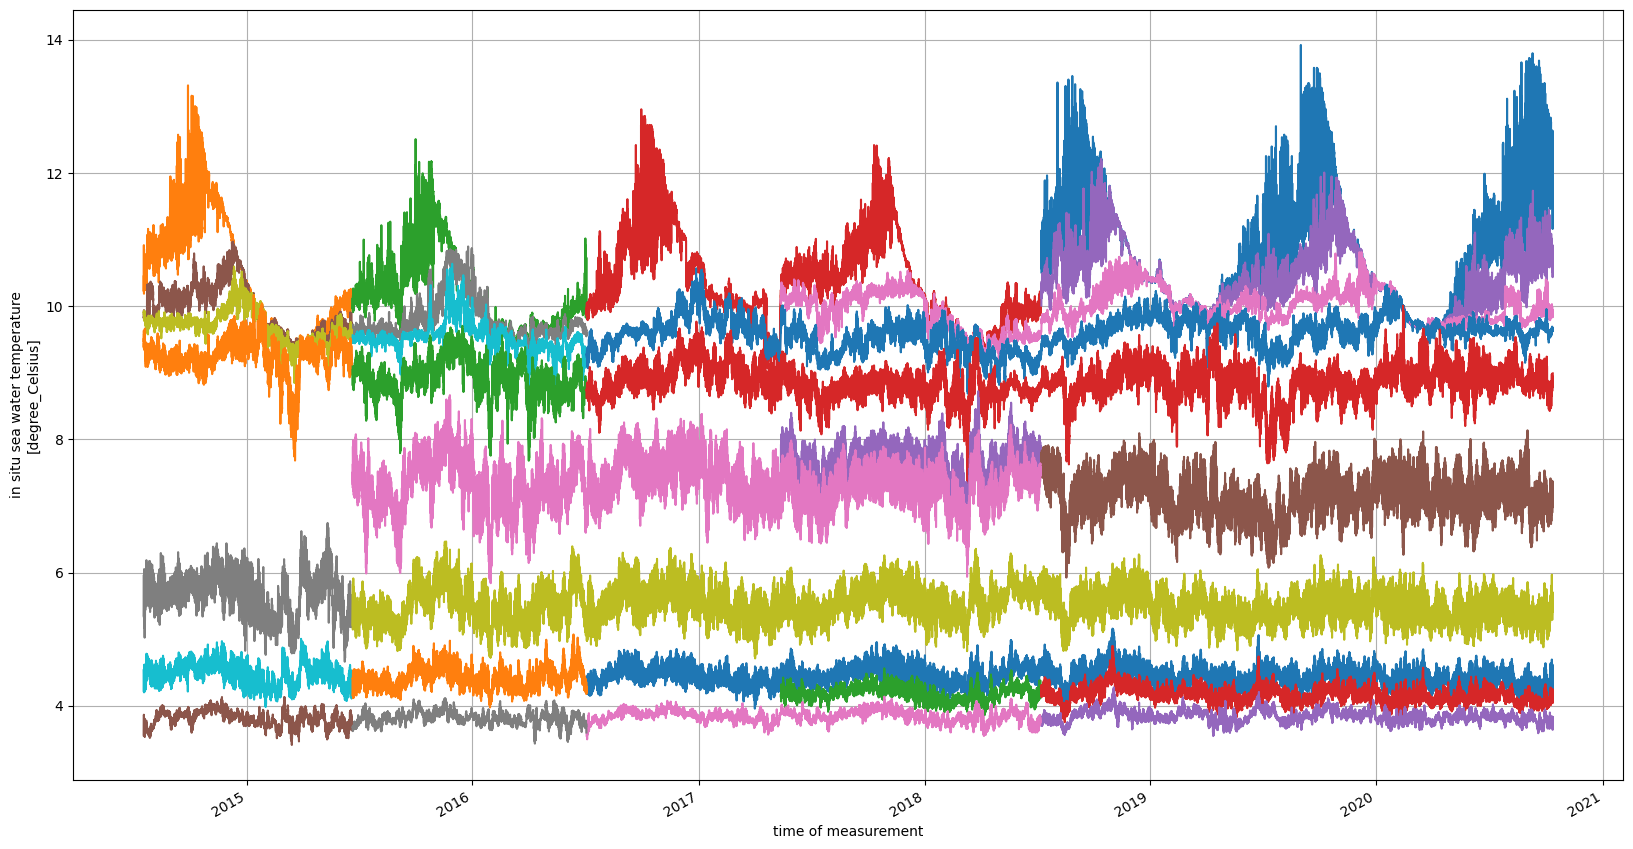

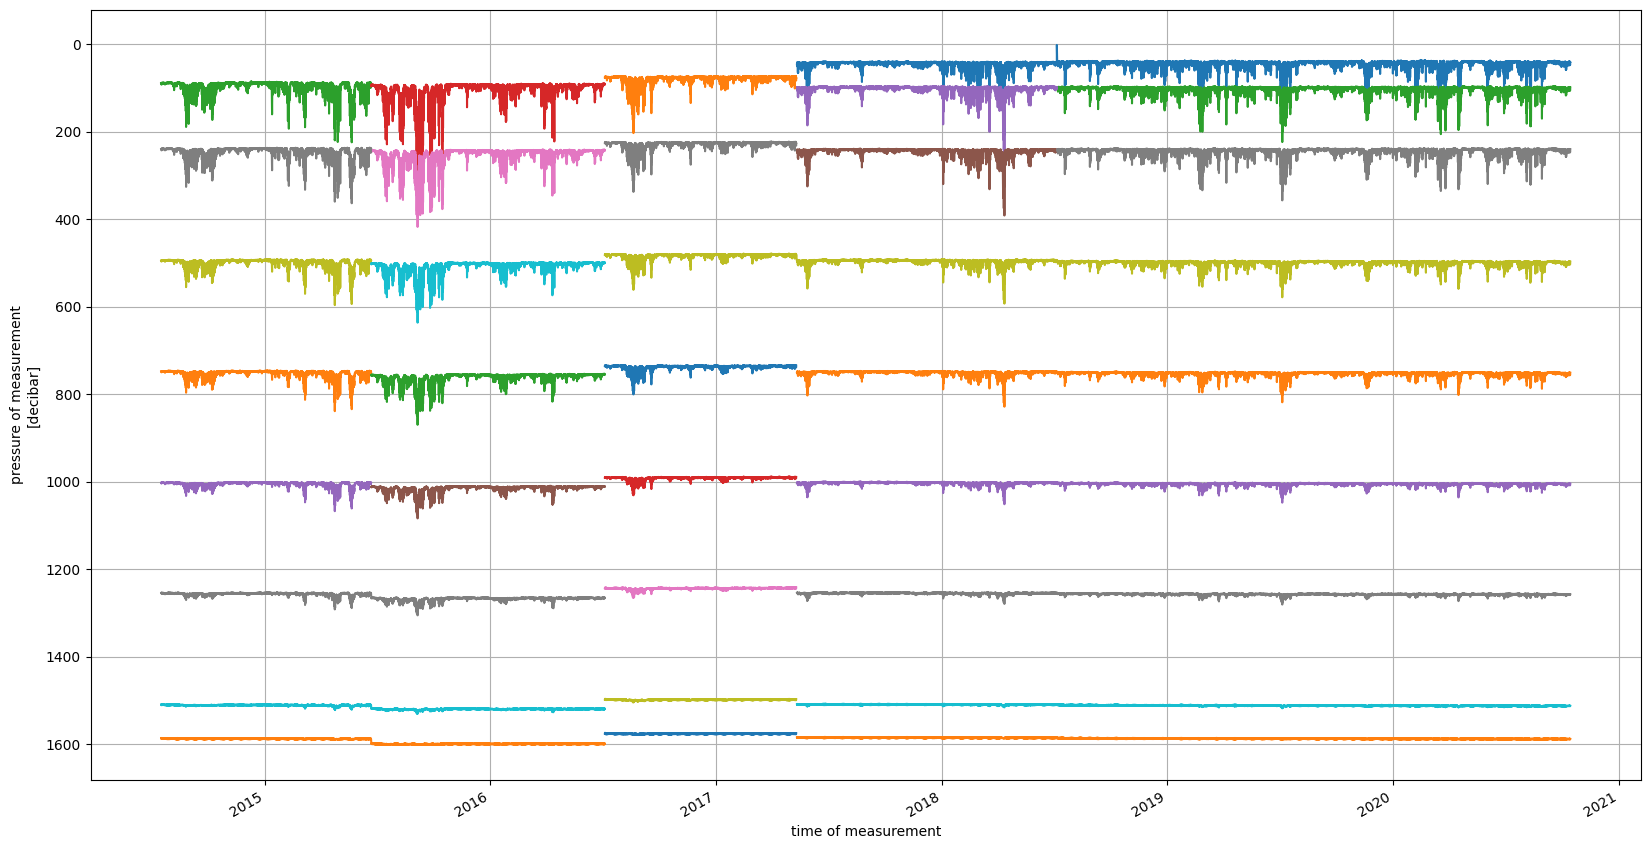

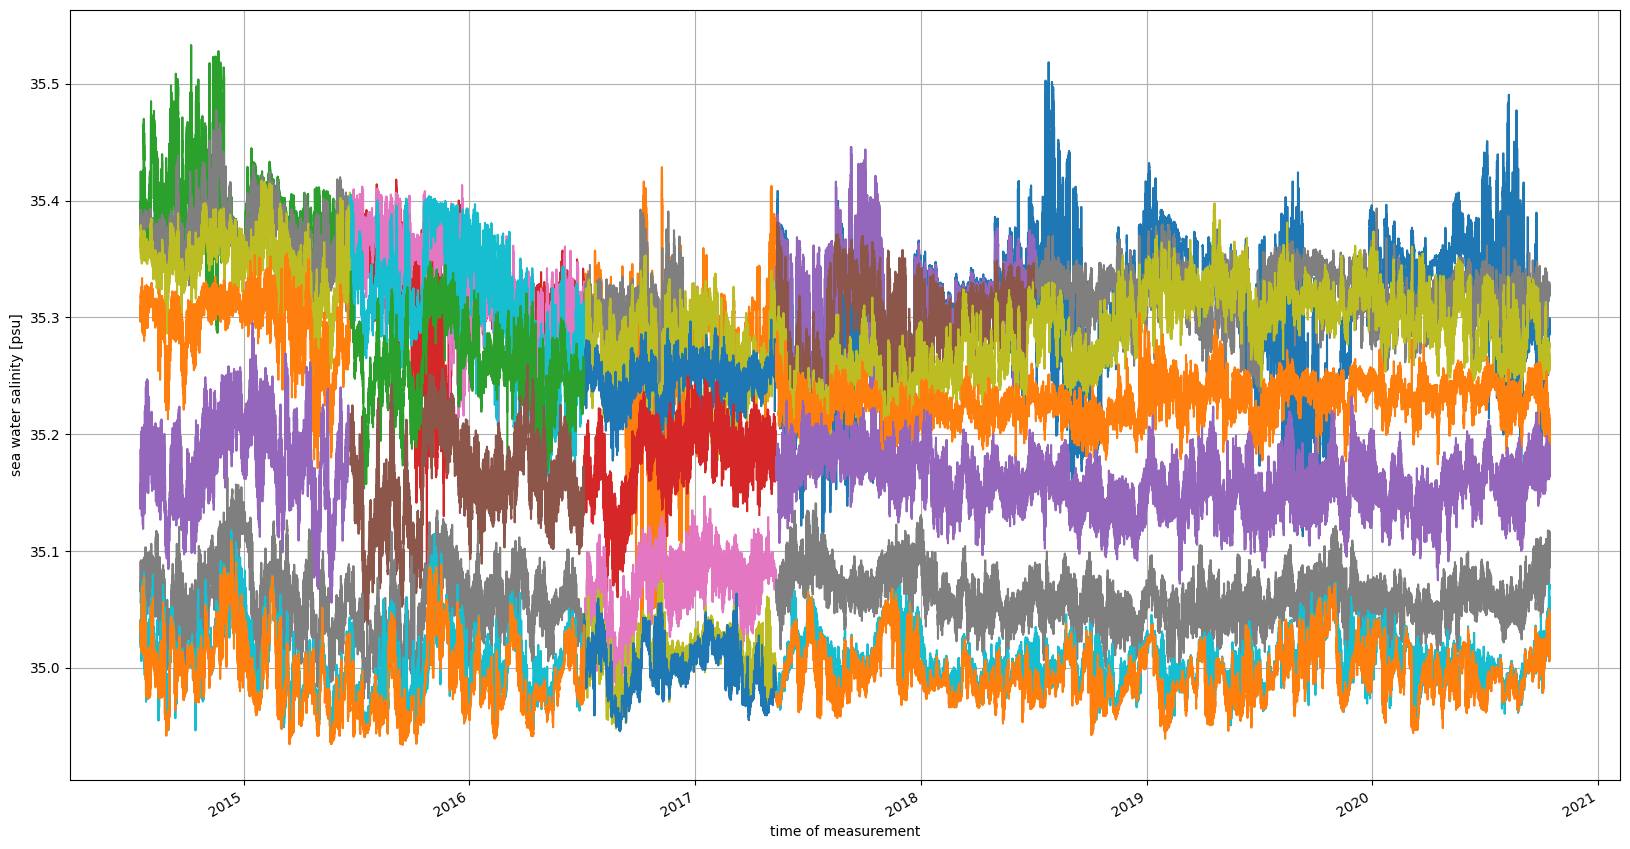

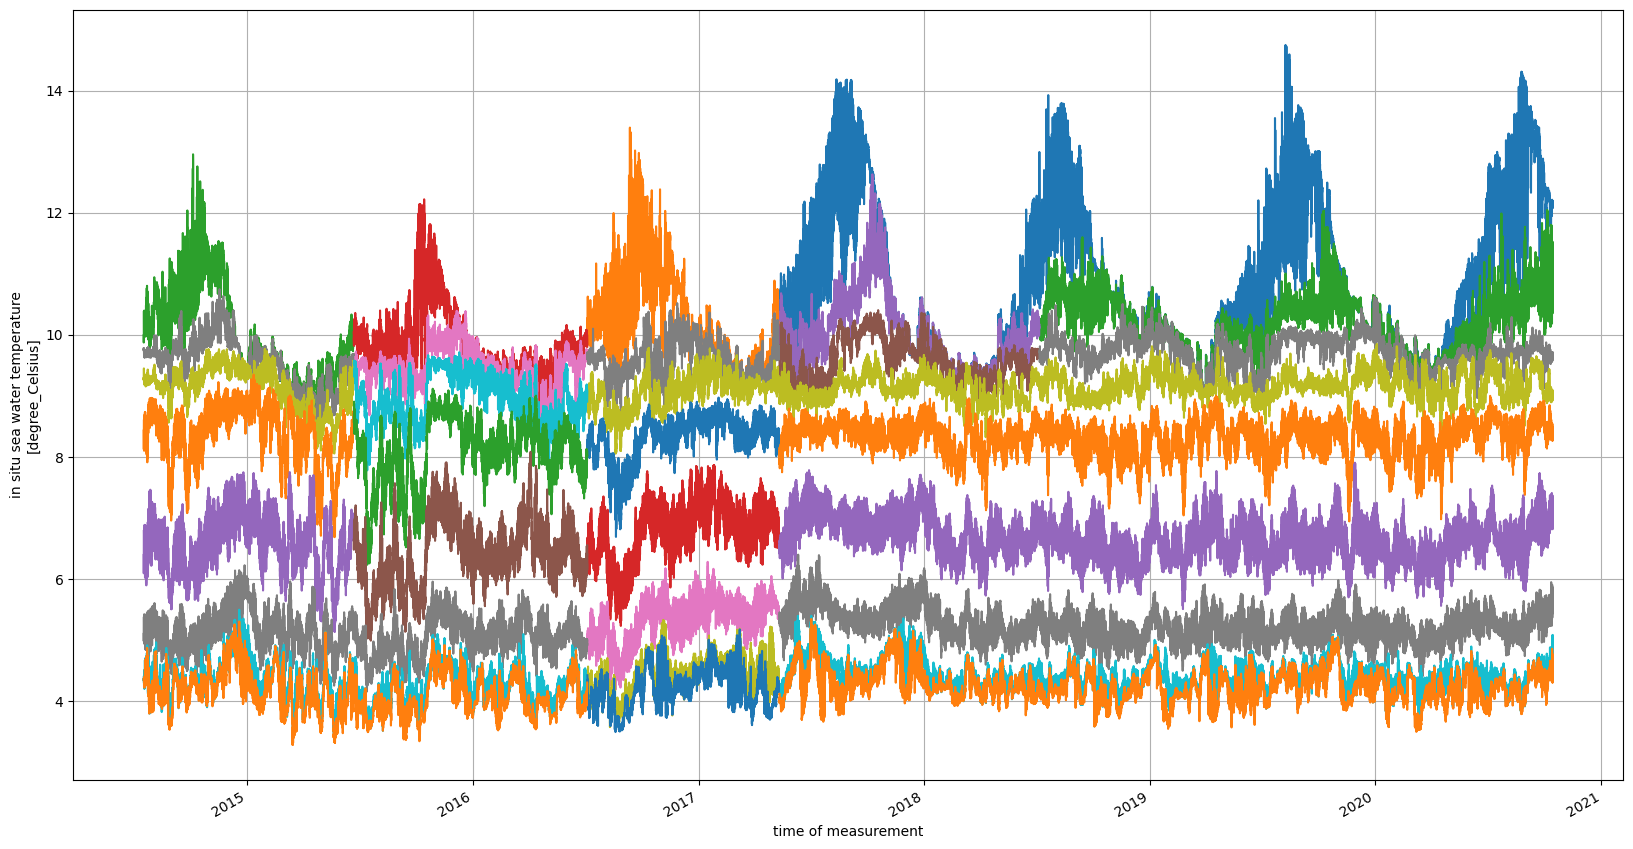

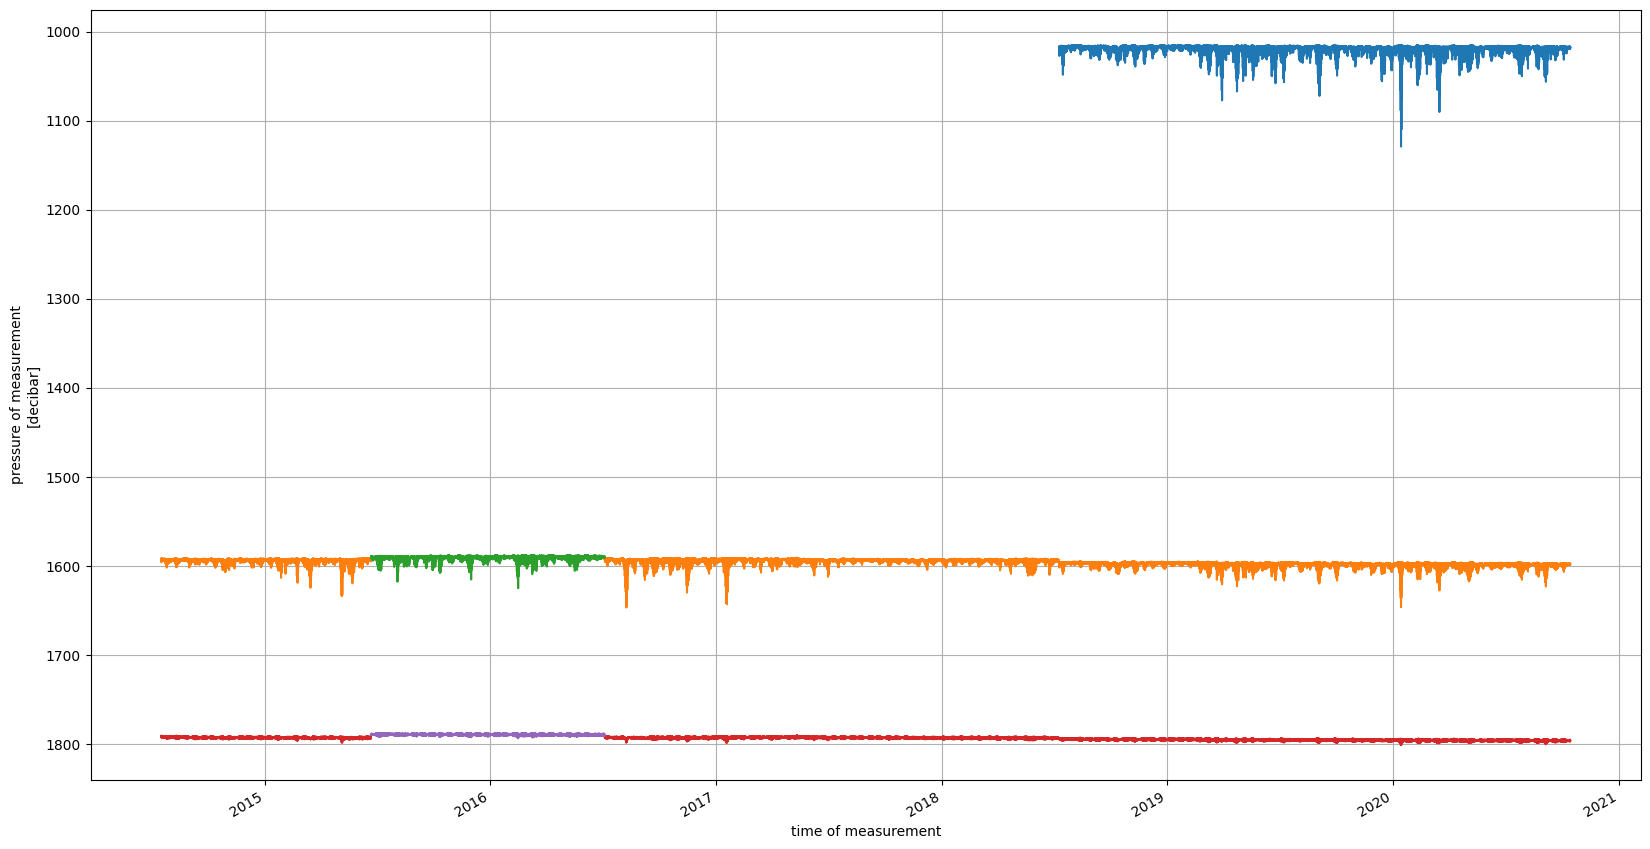

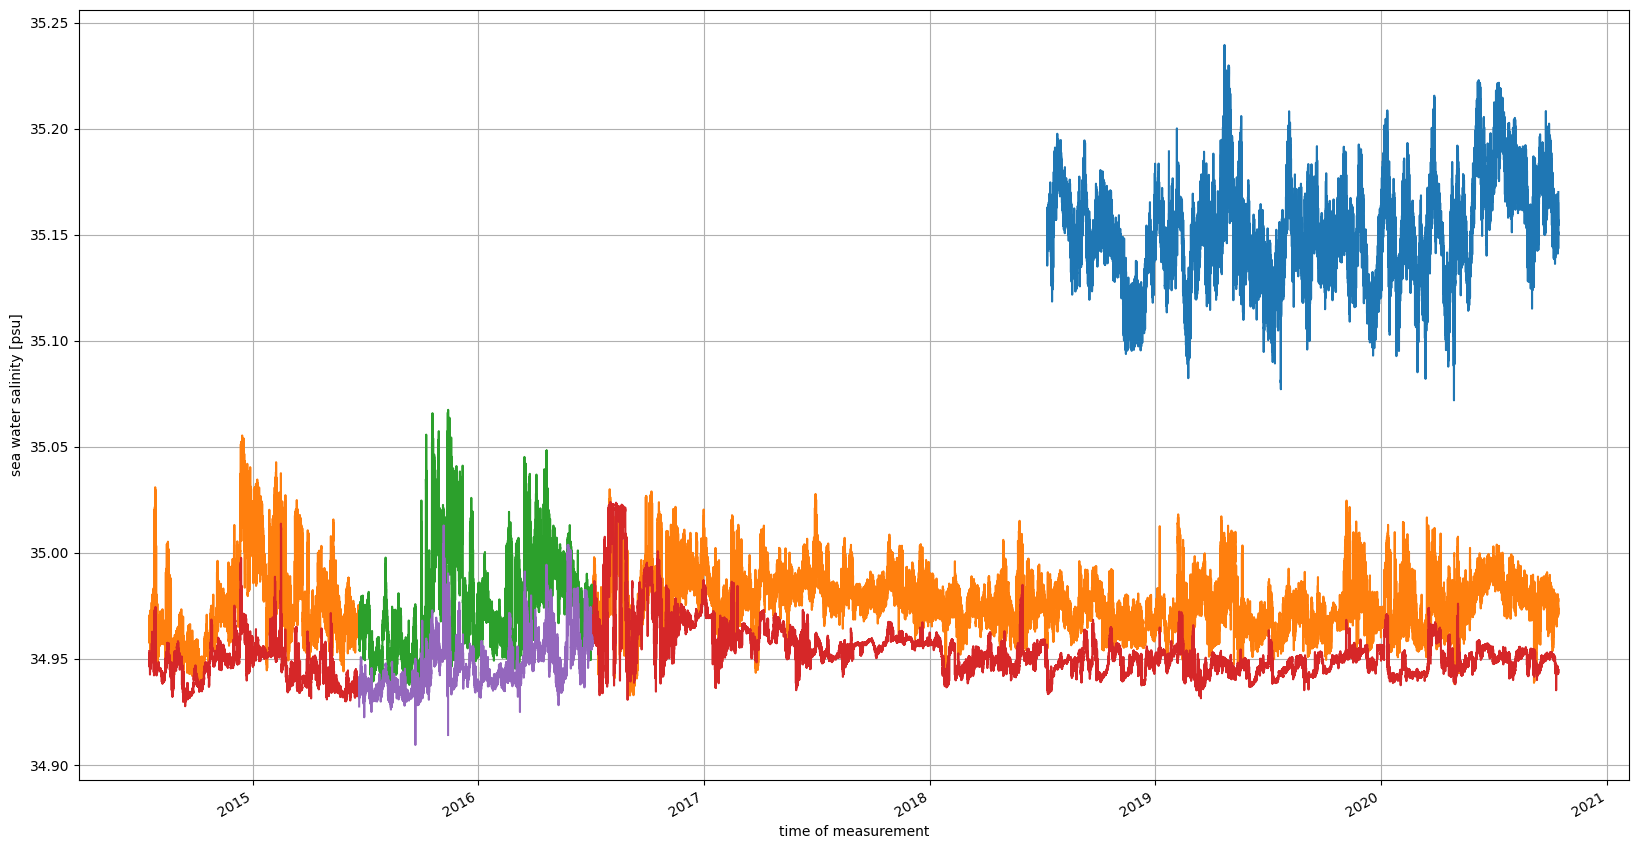

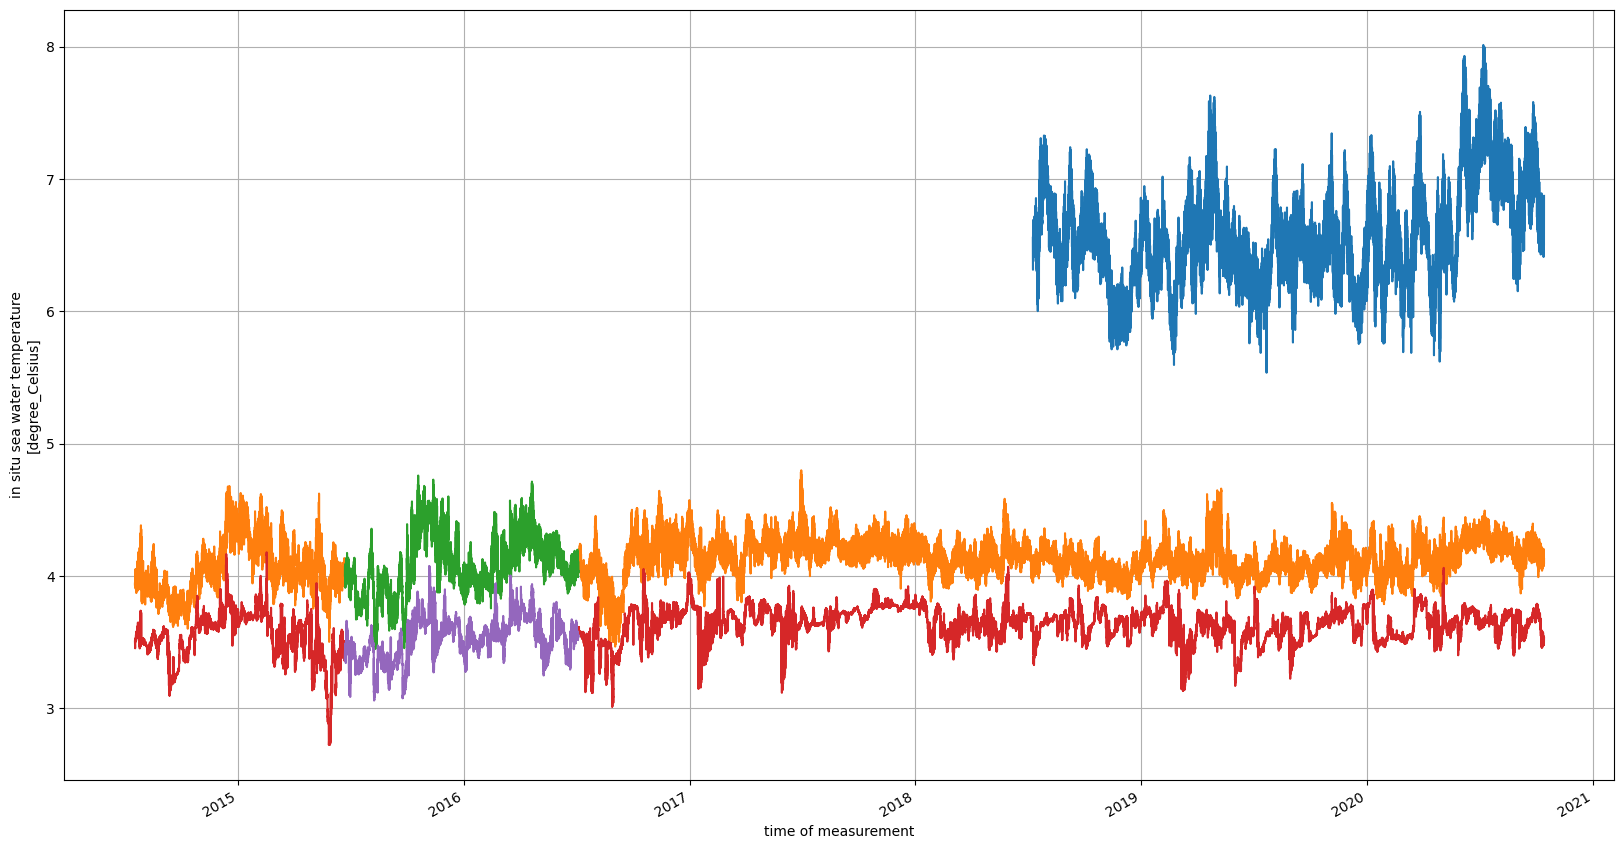

In [1]:
### global import and set paths
import os
import glob
import xarray as xr
import numpy as np
import datetime
import pandas as pd
from IPython.display import clear_output
import matplotlib.pyplot as plt
from pathlib import Path

# set paths
indir='C:\\Users\\sa01ld\\m_moorproc_toolbox\\exec\\gitrepo\\export_Oceansites\\oceansites_format'
outdir='X:\\Marphys_Archive\\Data\\OSNAP\\THREDDS_DATA'

moorings=['RTEB1','RTWB1','RTWB2'
         ]
deployments=['01_2014','02_2015','03_2016','04_2017','05_2018']

sensor='MCTD'

startdate='201407'# does not change!
enddate='202207'

## Begin loop
for numbmoor,moor in enumerate(moorings):
    ds=[]
    #make path to datafile
    outfile = os.path.join(outdir,'Rockall_Trough_mooring_'+moor+'_stacked_time_series_TS_'+startdate+'_'+enddate+'_v0.nc')
    
    # list the deployments from each mooring
    thisdeployemnt=deployments
    for num,deploy in enumerate(thisdeployemnt):
        moor_file=os.path.join(indir,moor+'*'+deploy +'*MCAT*')
        fle=glob.glob(moor_file)    
        print('deployment '+deploy)      
        if fle:
            # print data file name
            print(fle[0])
            # open dataset as ds
            ds=xr.open_dataset(fle[0])      
            # if there are duplicates, then drop the last one. The first is often the non-ODO microCAT
            # need to write a function here
            #  REMOVE DUPLICATES USING THE DEPTH DIMENSION
            ds=ds.drop_duplicates(dim="DEPTH", keep="first")

#             ###### INTERPOLATE TO 2 HOUR TIME STEP ####################################################
#             # make start closest hour to start time plus 30 min 
#             start=ds.TIME.values[0] + np.timedelta64(30,'h')
#             start=np.datetime64(start,'h')
#             print(start)

#             # make start closest hour to end time minus 30 min 
#             end=ds.TIME.values[-1] - np.timedelta64(30,'h')
#             end=np.datetime64(end,'h')
#             print(end)

#             # linear interpolation of data in 30 min intervals
#             timeint = (pd.DataFrame(columns=['NULL'],
#                           index=pd.date_range(start, end,
#                                               freq='2H'))
#                .index.strftime('%Y-%m-%dT%H:%M:%S.%f')
#                .tolist())
#             df=ds.interp(TIME=timeint)
            
        else:
            print('no microcat data from this deployment')
            break 
        if num==0:
            dfmerge=ds
        else:
            dfmerge=xr.merge([dfmerge,ds])

        dfmerge.to_netcdf(outfile) 
        print(' data from this deployment are saved at ' + outfile)
        
    dfmerge.PRES.plot.line(x='TIME',aspect=2, size=10,add_legend=False)
    plt.gca().invert_yaxis()
    plt.grid()

    dfmerge.PSAL.plot.line(x='TIME',aspect=2, size=10,add_legend=False)
    plt.grid()

    dfmerge.TEMP.plot.line(x='TIME',aspect=2, size=10,add_legend=False)
    plt.grid()


In [2]:
dfmerge


<xarray.Dataset>
Dimensions:    (TIME: 109368, LATITUDE: 5, LONGITUDE: 4, DEPTH: 5)
Coordinates:
  * TIME       (TIME) datetime64[ns] 2014-07-17T16:30:01.043999488 ... 2020-1...
  * LATITUDE   (LATITUDE) float32 57.47 57.47 57.47 57.47 57.47
  * LONGITUDE  (LONGITUDE) float32 -12.33 -12.31 -12.31 -12.31
  * DEPTH      (DEPTH) float32 1e+03 1.575e+03 1.576e+03 1.77e+03 1.771e+03
Data variables:
    PRES       (TIME, DEPTH) float32 nan nan nan nan ... nan 1.796e+03 nan
    TEMP       (TIME, DEPTH) float32 nan nan nan nan nan ... 4.129 nan 3.532 nan
    PSAL       (TIME, DEPTH) float32 nan nan nan nan nan ... 34.97 nan 34.95 nan
    CNDC       (TIME, DEPTH) float32 nan nan nan nan nan ... 33.35 nan 32.87 nan
Attributes: (12/53)
    site_code:                     OSNAP
    platform_code:                 OSNAP-rtwb2_01_2014
    data_mode:                     D
    title:                         OSNAP MCTD Data 07/2014-06/2015
    summary:                       Water temperature and salinity at nominal ...
    naming_authority:              OceanSITES
    ...                            ...
    history:                       Delayed time processed quality controlled
    processing_level:              calibration using pre- and post- deploymen...
    QC_indicator:                  excellent
    contributor_name:              Stuart Cunningham; Sam Jones; Loic Houpert...
    contributor_role:              data processing and interpretation
    contributor_email:             stuart.cunningham@sams.ac.uk; sam.jones@sa...